<a href="https://colab.research.google.com/github/ignaciovaldes/inteligencia-artificial-y-aprendizaje-automatico/blob/main/Actividad_Semana_9_Equipo42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

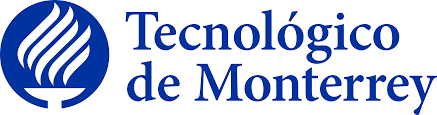

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 9**
###**Práctica: Bayes ingenuo y vecino más cercano**


**Nombres y matrículas de los integrantes del equipo:**

*  Norma de los Ángeles García López A01228278
*  Ramón Ariel Iván Muñoz Corona A01330566
*  Denisse María Ramírez Colmenero A01561497
*  Ignacio Valdés Reyes  A01793262
*  Rigoberto Vega Escudero. A01793132 

1) Realiza un resumen de máximo 1 cuartilla de dicho artículo.

Con base a la taxonomía de tres tipos de métricas definidas en el artículo (threshold, probabilistic and ranks) analiza los siguientes conjuntos de datos y en cada uno de ellos deberás hacer una propuesta de cuál o cuáles serían las mejores métricas a utilizar en cada caso. Justifica adecuadamente cada propuesta de acuerdo al tipo de problema y tipo de datos. 

En particular haz énfasis en la métricas que hemos estado estudiando en el curso, las cuales de manera
general han sido varias de las principales que usualmente se aplican, o en dado caso algunas de sus
variantes. Asimismo determina se lo consideras un problema de clases o no balanceadas. Lee la
información de cada liga para que contextuelices el “entendimiento del negocio”. 



# **1. Resumen.**
## Una comparación experimental de las medidas de rendimiento para clasificación.
C. Ferri, J. Hernández-Orallo, R. Modroiu

Las medidas de performance dentro de la clasificación son fundamentales en la evaluación de la calidad de los métodos de aprendizaje.

La correcta evaluación de los modelos con un aprendizaje dado es el problema más importante en el reconocimiento de patrones. Podemos tener de un lado una evaluación basada en significados estadísticos o intervalos de confianza, para obtener que un modelo es mejor que otro, pero a la vez queremos tener confianza en estas evaluaciones de cuál es la mejor métrica para evaluar un modelo. Este artículo estará usando 18 métricas diferentes que están clasificadas en 3 familias.

- Métricas basadas en un umbral y una comprensión cualitativa de error: precisión, precisión macro promediada (aritmética y geométrica), medida OF media (puntuación F) y estadística Kappa. Estas medidas se utilizan cuando queremos un modelo que minimice el número de errores.

- Métricas basadas en una comprensión probabilística del error, es decir, midiendo la desviación de la verdadera probabilidad: error absoluto medio, error cuadrático medio (puntaje de Brier), LogLoss (entropía cruzada), dos versiones de la tasa de probabilidad (rango) y dos medidas para calibración. Estas medidas son especialmente útiles cuando queremos evaluar la fiabilidad de los clasificadores, no sólo midiendo cuándo fallan sino si ha seleccionado la clase equivocada con una probabilidad alta o baja.

- Métricas basadas en qué tan bien clasifica el modelo los ejemplos: AUC, que para dos clases es equivalente a la estadística de Mann-Whitney-Wilcoxon, y está estrechamente relacionada con el concepto de separabilidad. Estos son importantes para muchas aplicaciones, como campañas de correo electrónico, gestión de relaciones con clientes (CRM), sistemas de recomendación, detección de fraude, filtrado de spam, etc.

Cada métrica por separado tiene su propia definición, fórmula, etc. Las cuales nos dicen las propiedades y cómo utilizarlas en modelos de Machine Learning. Pero en general se busca tener interés en medidas que sean sensitivas a buena elección del umbral, métricas que cuantifiquen la calidad de los datos y medidas que cuantifiquen la desviación de las probabilidades.

Para evaluar todas estas métricas se usaron 6 modelos de aprendizaje automático como J48, Naive Bayes, Logistic Regression, Multilayer Perceptron, K-Nearest Neighbour y AdaBoost. Para evaluar 30 conjuntos de datos de todos los tipos, balanceados, no balanceados, binarios, multiclase. Una observación general es que todas las correlaciones son positivas y, por lo general, fuertes superiores a 0,5). Las únicas excepciones claras son algunas correlaciones entre LogL y algunas medidas probabilísticas, que a priori podríamos considerar en la misma familia.

También, además se llevan a cabo análisis de sensibilidad a los resultados ya que, a pesar de ver resultados con las correlaciones positivas, podemos introducir ruidos a los modelos para ver como esto altera el comportamiento de los resultados de nuevo. 

Tipos de Ruido:

- Ruido de clasificación errónea: el ruido se aplica a las clases reales
- Ruido de probabilidad: el ruido se aplica a las probabilidades que producen los modelos para cada predicción.
Clasificación de ruido: el ruido se aplica a la clasificación de la predicción del modelo.
- Ruido de proporción de clase: el ruido se aplica a la frecuencia de las clases del conjunto de datos, es decir, variamos la proporción de clases.

Donde se pudo determinar que la precisión y otras medidas cuantitativas son las mejores cuando el ruido está presente en los conjuntos de datos y consecuentemente los modelos evaluados bajo estas métricas serán más robustos. Pero teniendo en cuenta que pueden llegar a ser malos cuando la distorsión se produce durante el entrenamiento. Para estos casos el AUC o medidas basadas en la probabilidad funcionarán mejor.

El análisis anterior muestra que la mayoría de las medidas utilizadas en el aprendizaje automático y el reconocimiento de patrones para evaluar clasificadores realmente miden cosas diferentes, especialmente para problemas multiclase y problemas con distribución de clase desequilibrada, donde las correlaciones son peores. Uno de los resultados más sorprendentes del estudio es que las correlaciones entre métricas dentro de una misma familia no son muy altas, lo que demuestra que con una comprensión probabilística del error es muy diferente usar MSE, LogL o MPR. Es aún más diferente para las medidas de calibración. Con una comprensión cualitativa del error, todavía es diferente usar Acc o MAvG, aunque las correlaciones en este grupo son más altas. El único grupo compacto ocurre cuando queremos clasificar las predicciones, y no es significativamente diferente usar diferentes variantes de AUC.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
mypath = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 10/Breast Cancer/wdbc.data'
data_BC = pd.read_csv(mypath, sep=",", header=None)
data_BC.rename(columns = {0 : 'ID number', 1: 'Diagnosis'}, inplace = True)
# data_BC.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11']
data_BC.head()

,ID number,Diagnosis,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 3. South German Credit Data Set

In [ ]:
mypath = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 10/SouthGermanCredit/SouthGermanCredit.asc'
data_SGC = pd.read_csv(mypath, sep=" ")
data_SGC.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration',
                'installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans',
                'housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
data_SGC.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# 4.  Telco customer churn: IBM dataset: 


In [ ]:
mypath = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 10/Telco customer churn IBM dataset/Telco_customer_churn.xlsx'
data_TCC = pd.read_excel(mypath)
data_TCC.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# 5. Qualitative_Bankruptcy Data Set

In [ ]:
mypath = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 10/Qualitative_Bankruptcy Data Set/Qualitative_Bankruptcy.data.txt'
data_QBK = pd.read_csv(mypath, sep=",", header=None)
data_QBK.columns = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']
data_QBK.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


#Referencias.

- C. Ferri, J. Hernández-Orallo, R. Modroiu, An experimental comparison of performance measures for classification, Pattern Recognition Letters, Volume 30, Issue 1, 2009, Pages 27-38.